# [Kaggle Competition](https://www.kaggle.com/competitions/paddy-disease-classification)

In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
from jupyter_helpers import *
from helpers import *

set_seed(99, True)

In [3]:
bs = 128

(640, 480)


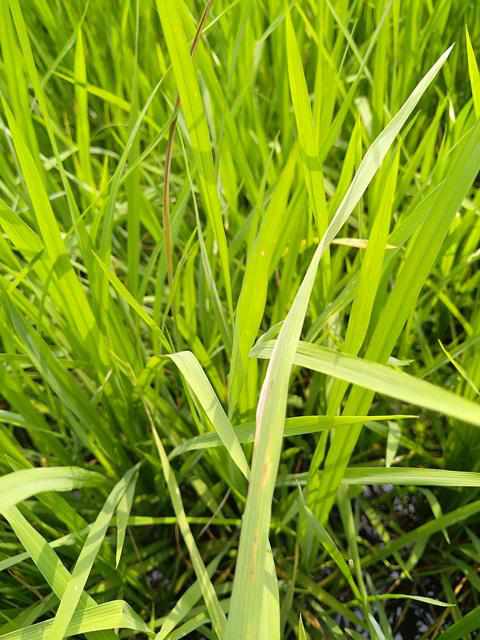

In [4]:
im = Image.open(path/'train_images/bacterial_leaf_blight/100330.jpg')

print(im.shape)

im

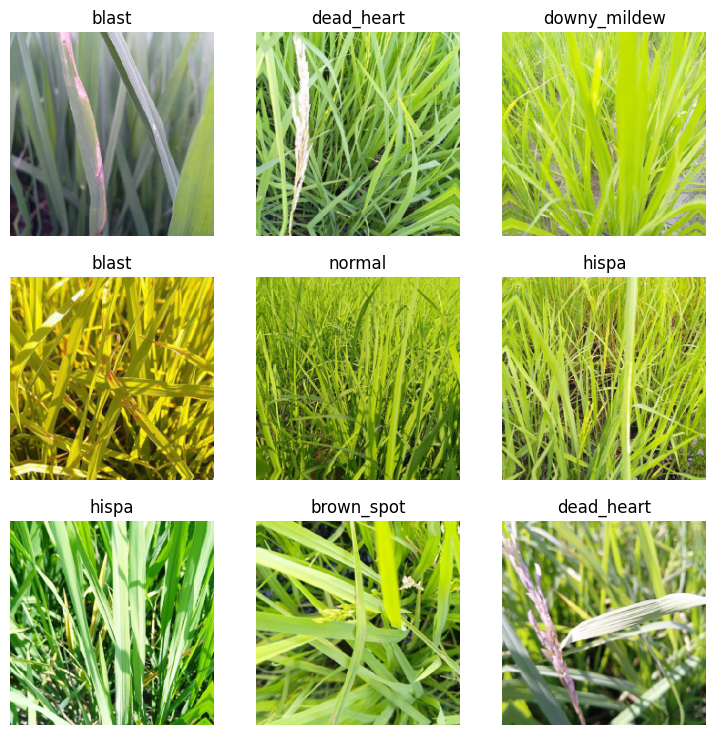

In [5]:
dls = get_image_dls(bs)
dls.show_batch()

In [6]:
x_b, y_b = dls.one_batch()
x_b = x_b.to(device)
y_b = y_b.to(device)

x_b.device, y_b.device

(device(type='mps', index=0), device(type='mps', index=0))

In [7]:
arch = 'resnet18'
# arch = 'levit_256'
# arch = 'levit_384'

SuggestedLRs(steep=0.0012022644514217973, valley=0.0014454397605732083)

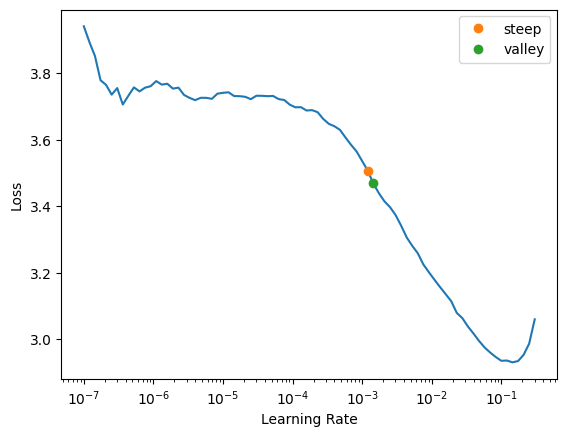

In [10]:
learn = vision_learner(dls, arch, metrics=[accuracy], cbs=[ToDeviceCallback()])
learn.lr_find(suggest_funcs=(steep, valley))

In [11]:
lr = 3e-3

In [12]:
learn.fit_one_cycle(5, lr)

epoch,train_loss,valid_loss,accuracy,time
0,2.266263,1.276993,0.603556,02:08
1,1.577061,0.943828,0.678039,02:09
2,1.204419,0.790381,0.742912,02:07
3,1.021251,0.736968,0.761653,02:05
4,0.942454,0.721391,0.760211,02:06


In [13]:
learn = vision_learner(dls, arch, metrics=[accuracy], cbs=[ToDeviceCallback()])
learn.freeze_to(-1)
learn.fit_one_cycle(1, lr)

learn.freeze_to(-2)
learn.fit_one_cycle(1, lr/2)

learn.unfreeze()
learn.fit_one_cycle(10, lr/4)

epoch,train_loss,valid_loss,accuracy,time
0,1.960962,1.218154,0.628063,02:06


epoch,train_loss,valid_loss,accuracy,time
0,1.104044,0.642033,0.788563,02:19


epoch,train_loss,valid_loss,accuracy,time
0,0.671365,0.442476,0.854877,02:18
1,0.613334,0.621720,0.799616,02:14
2,0.579656,0.943163,0.748679,02:14
3,0.437580,0.759284,0.790485,02:14
4,0.325883,0.382490,0.882268,02:18
5,0.240795,0.242489,0.924075,02:14
6,0.166642,0.167387,0.950505,02:14
7,0.119436,0.115156,0.964921,02:13
8,0.083067,0.115839,0.966362,02:13
9,0.060405,0.112394,0.967804,02:13


# Make a submission

In [25]:
image_files = get_image_files(path/'test_images')
test_dl = learn.dls.test_dl(image_files)
preds, targs, decoded = learn.get_preds(dl=test_dl, with_decoded=True)

In [26]:
preds.shape, targs, decoded.shape

(torch.Size([3469, 10]), None, torch.Size([3469]))

In [29]:
preds[:5]

TensorBase([[9.5254e-06, 3.2643e-05, 4.2968e-06, 9.6325e-01, 3.8429e-06,
             1.6578e-06, 3.6216e-02, 4.0767e-04, 1.5998e-05, 6.2634e-05],
            [4.8940e-06, 4.5690e-06, 3.8024e-06, 4.6887e-05, 1.5645e-05,
             3.6983e-06, 1.4457e-06, 1.0161e-04, 9.9981e-01, 5.3826e-06],
            [7.2413e-05, 3.5481e-06, 8.7208e-06, 4.6574e-05, 1.1140e-05,
             2.2949e-05, 3.0900e-05, 1.1966e-04, 9.9916e-01, 5.2268e-04],
            [2.7626e-08, 7.5725e-08, 5.7715e-07, 1.5779e-06, 9.7781e-06,
             1.0172e-07, 6.4731e-05, 2.8467e-07, 5.1335e-07, 9.9992e-01],
            [1.2753e-02, 9.8721e-01, 7.0964e-06, 2.2868e-07, 1.6012e-05,
             6.5771e-06, 5.7823e-06, 5.5603e-09, 1.2485e-07, 3.4923e-06]])

In [38]:
preds.argmax(dim=1)[:5], decoded[:5]

(TensorBase([3, 8, 8, 9, 1]), TensorBase([3, 8, 8, 9, 1]))

In [46]:
df = pd.DataFrame({
    'image_id': image_files,
    'label': dls.vocab[decoded],
})

df['image_id'] = df.image_id.map(lambda x: x.name)

df.head()

,image_id,label
0,202919.jpg,blast
1,200868.jpg,normal
2,200698.jpg,normal
3,200840.jpg,tungro
4,201586.jpg,bacterial_leaf_streak


In [47]:
create_submission(df, 'paddy-disease-classification', id_col='image_id', label_col='label', should_submit=True)

100%|██████████| 70.4k/70.4k [00:00<00:00, 139kB/s]


,image_id,label
1167,200001.jpg,hispa
958,200002.jpg,normal
981,200003.jpg,blast
1399,200004.jpg,blast
1412,200005.jpg,blast
...,...,...
2369,203465.jpg,dead_heart
2577,203466.jpg,hispa
2393,203467.jpg,normal
1092,203468.jpg,bacterial_leaf_streak


![Kaggle Submission](../../../../var/folders/g4/pxngykv555x357p3t84y0wdh0000gn/T/TemporaryItems/NSIRD_screencaptureui_rZMTXR/Screenshot%202022-12-15%20at%203.07.41%20PM.png)